# Plane wave

In this first lab of the ErSE 210 - Seismology course, we will look at *Plane waves*.

First of all we will some basic Python numerical libraries to create and visualize a plane wave defined as:
    
$$
u(\textbf{x}, t) = A exp^{-j(2\pi f t-\textbf{p}\textbf{x} + \phi)}
$$

where $A$ is the amplitude, $f$ is the frequency, $\textbf{p}$ is the slowness vector, and $\phi$ is the initial phase.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interactive

In [2]:
def plane_wave(x, y, A, f, c, theta, phi):
    """Plane wave modelling
    """
    # Define x and y grid
    Y, X = np.meshgrid(y, x, indexing='ij')

    t = 0 # time-snapshot
    p = (np.cos(np.deg2rad(theta)) / c,
         np.sin(np.deg2rad(theta)) / c) # slowness vector
    
    # Construct plane wave
    pw = A * np.exp(-1j * (2 * np.pi * f * (t - (p[0]*X + p[1]*Y)) + np.deg2rad(phi)))
    pw = np.real(pw)
    
    return pw, p

## Single plane wave

Let's start by creating a single plane wave. Here we select the different parameters that define a plane wave, you can experiment with them and see how they affect the shape of our wave.

In [3]:
# Define x and y axes
ox, dx, nx = 0, 5, 101
oy, dy, ny = 0, 5, 101

x, y = np.arange(nx) * dx + ox, np.arange(ny) * dy + oy 
Y, X = np.meshgrid(y, x, indexing='ij')

# Define plane wave parameters
A = 10 # amplitude
f = 20 # frequency
c = 1500 # Velocity
theta = 20 # Angle
phi = 180 # initial phase
t = 0 # time-snapshot

pw, p = plane_wave(x, y, A, f, c, theta, phi)

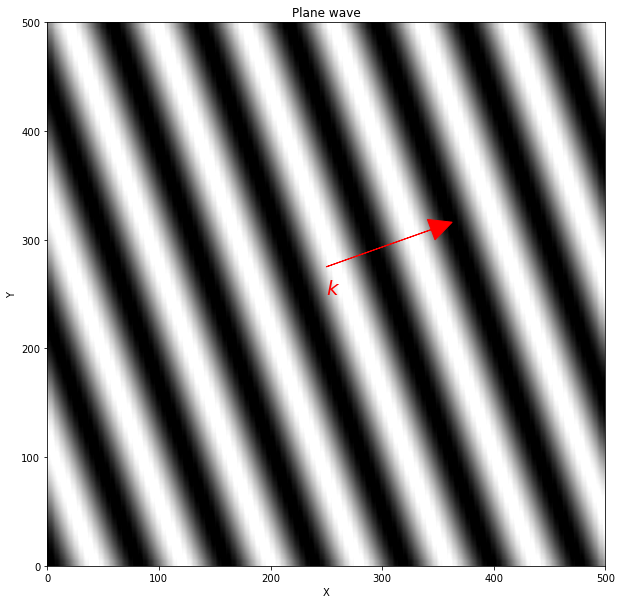

In [4]:
# 2D top view
plt.figure(figsize=(10, 10))
plt.imshow(pw, extent=(x[0], x[-1], y[0], y[-1]), cmap='gray', 
           origin='lower', interpolation='sinc')
plt.arrow(x[nx//2], y[ny//2+5], p[0] * c * dx * 20, p[1] * c * dx * 20,
          head_width=20, head_length=20, fc='r', ec='r')
plt.text(x[nx//2], y[ny//2], r'$k$', color='r', fontsize=20)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Plane wave')
plt.axis('tight');

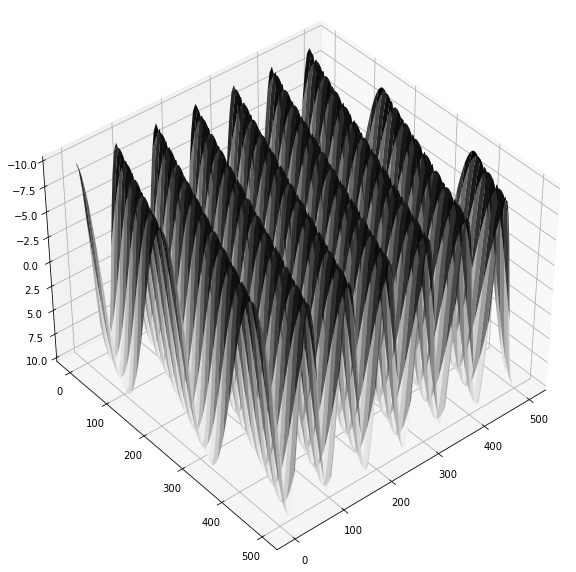

In [5]:
# 3D view
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, pw, cmap='gray')
ax.view_init(-140, -50)
ax.axis('tight')
plt.tight_layout()

We can now look at the wavenumber spectrum. Given that we have one plane wave the energy should be all localized around one location, that of the $(k_x, k_y)$ pair that defines the plane wave uniquely.

**Question**: express $k_x$ and $k_y$ as function of the slownesses $p_x$ and $p_y$

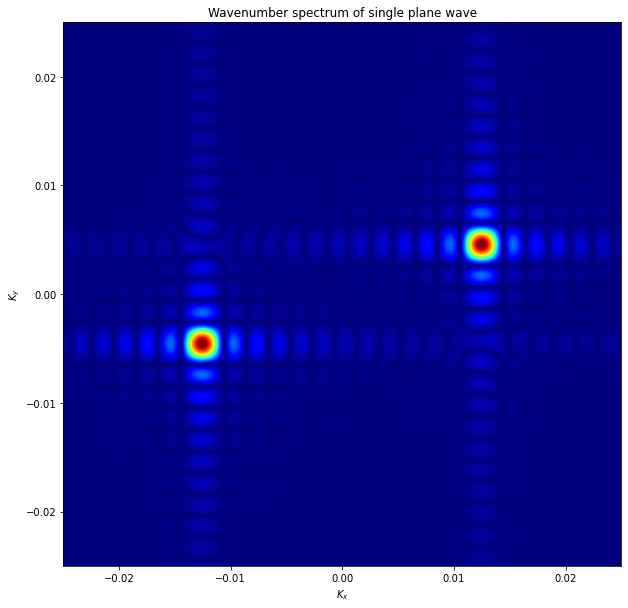

In [6]:
nf = 2**10
PW = np.fft.fft2(pw, (nf, nf))
kx, ky = np.fft.fftshift(np.fft.fftfreq(nf, dx)), np.fft.fftshift(np.fft.fftfreq(nf, dy))

plt.figure(figsize=(10, 10))
plt.imshow(np.fft.fftshift(np.abs(PW)), extent=(kx[0], kx[-1], ky[0], ky[-1]),  
           cmap='jet', origin='lower', interpolation='sinc')
plt.xlabel(r'$K_x$')
plt.ylabel(r'$K_y$')
plt.title('Wavenumber spectrum of single plane wave')
plt.axis('tight')
plt.xlim(-0.025, 0.025)
plt.ylim(-0.025, 0.025);

Let's now play with the different parameters ($f$, $theta$, $\phi$, $c$) using ipywidget 

In [7]:
def display_planewave(theta, phi, f, c):
    # Define x and y axes
    ox, dx, nx = 0, 5, 101
    oy, dy, ny = 0, 5, 101

    x, y = np.arange(nx) * dx + ox, np.arange(ny) * dy + oy 
    Y, X = np.meshgrid(y, x, indexing='ij')

    # Define plane wave parameters
    A = 10 # amplitude
    t = 0 # time-snapshot

    pw, p = plane_wave(x, y, A, f, c, theta, phi)
    
    plt.figure(figsize=(10, 10))
    plt.imshow(pw, extent=(x[0], x[-1], y[0], y[-1]),  cmap='gray', origin='lower',
               interpolation='sinc')
    plt.arrow(x[nx//2], y[ny//2+5], p[0] * c * dx * 20, p[1] * c * dx * 20,
          head_width=20, head_length=20, fc='r', ec='r')
    plt.text(x[nx//2], y[ny//2], r'$k$', color='r', fontsize=20)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Plane wave')
    plt.axis('tight');

interactive_plot = interactive(display_planewave, theta=(-90.0, 90.0), 
                               phi=(-90.0, 90.0), f=(0, 50), c=(1000, 4000))
output = interactive_plot.children[-1]
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='theta', max=90.0, min=-90.0), FloatSlider(value=0.0,…

## Multiple plane waves

Finally, let's try to superimpose multiple plane waves and see how this can lead to a very complex pattern where each single plane wave is hardly distinguishable.

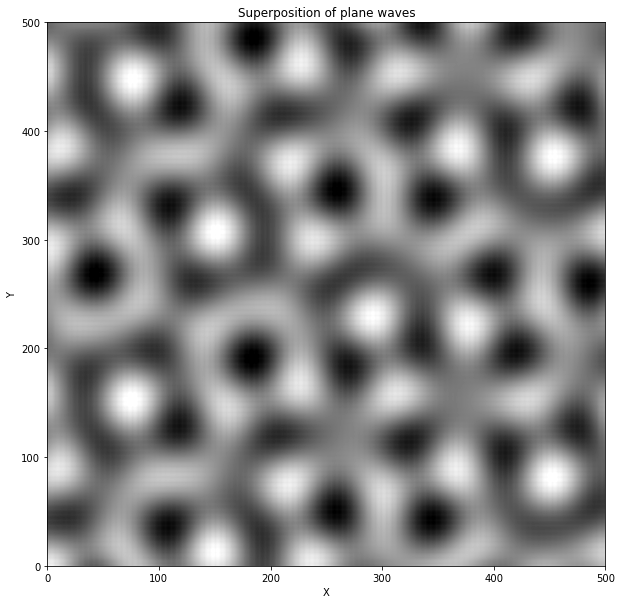

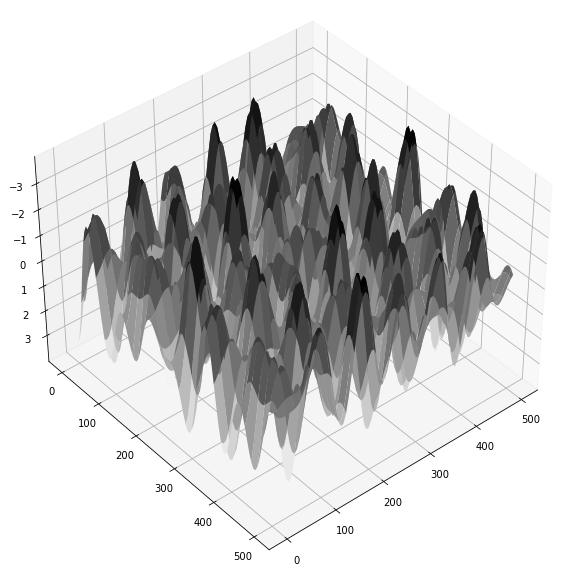

In [8]:
c = 1500
fs = [20, 20, 20, 20]
As = [1, 1, 1, 1]
thetas = [0, 90, -50, 30]
phis = [0, 20, 40, -60]

pw = [plane_wave(x, y, A, f, c, theta, phi)[0] for f, A, theta, phi in zip(fs, As, thetas, phis)]
pw = np.sum(pw, axis=0)

plt.figure(figsize=(10, 10))
plt.imshow(pw, extent=(x[0], x[-1], y[0], y[-1]),  cmap='gray', 
           origin='lower', interpolation='sinc')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Superposition of plane waves')
plt.axis('tight')

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, pw, cmap='gray')
ax.view_init(-140, -50)
plt.tight_layout()

Finally we show again the wavenumber spectrum. Now we should expect more points, how many?

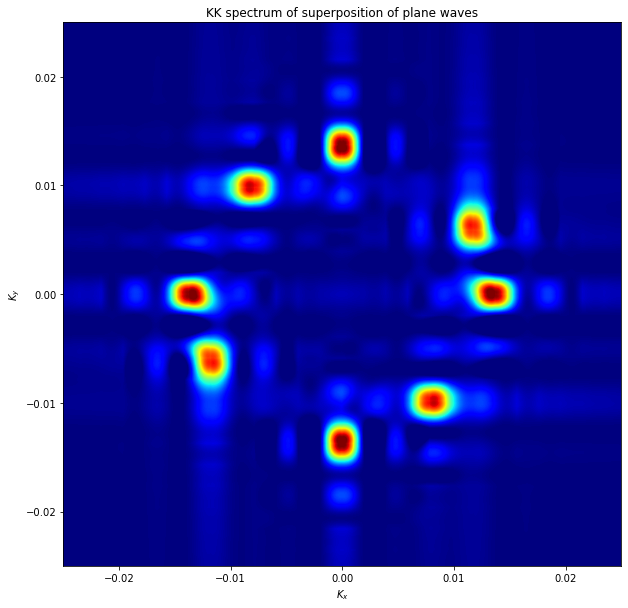

In [9]:
PW = np.fft.fft2(pw)
kx, ky = np.fft.fftshift(np.fft.fftfreq(nx, dx)), np.fft.fftshift(np.fft.fftfreq(ny, dy))

plt.figure(figsize=(10, 10))
plt.imshow(np.fft.fftshift(np.abs(PW)), extent=(kx[0], kx[-1], ky[0], ky[-1]),  
           cmap='jet', origin='lower', interpolation='sinc')
plt.xlabel(r'$K_x$')
plt.ylabel(r'$K_y$')
plt.title('KK spectrum of superposition of plane waves')
plt.axis('tight')
plt.xlim(-0.025, 0.025)
plt.ylim(-0.025, 0.025);

Once again play with the different parameters and see how the wavenumber spectrum changes!

**Question**: So far we have been able to predict how a plane wave would map into the wavenumber domain. However, if we change one of the parameters that we have used to create our plane wave this may not be the case anymore because our wavenumber spectrum becomes aliased. Which one?